# Data cleaning
In the previous lessons, we introduced you to some of clean datasets. We were able to easily handle the `pandas` library and its base classes: `Series`,` DataFrame` and `Index`. However, we took them as static objects, which we only viewed.
In this (shorter) lesson, we will show you how to do basic data cleaning when you get your dataset and what steps you should answer before you move to a more complex EDA.


We will show:
* basics ways how to work with data
* how to **nest functions** in pandas together
* what is a value **imputation**
* basic steps of Exploratory data analysis (EDA)

Everything you learn here now, will be useful in the next lesson where we will show you full EDA.

As always, first lets load our libraries

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("train.csv")

First step of exploring any data is always to check if they were loaded correctly.

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Already for reading data we can use multiple arguments - most important one is separator. Even though CSV stands for comma separated values, some people are using semicolon. If you do not know the delimiter used, your data after loading might looking like what you see below. Not good right? Thats why it is good to always visually check the data.

In [25]:
data1 = pd.read_csv("train.csv", sep = ";")
data1.head()

,"PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked"
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22,1,0,A/..."
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br..."
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26,0,0,S..."
3,"4,1,1,""Futrelle, Mrs. Jacques Heath (Lily May ..."
4,"5,0,3,""Allen, Mr. William Henry"",male,35,0,0,3..."


Another important argument is header. By default pandas are taking first row as a header. If you do not have any header and first row are just normal data, you can use **header=None** parameter to indicate it. You can also set any number to indicate as header line (remember that Python starts indexing with zero).

In [28]:
data2 = pd.read_csv("train.csv", header = None)
data2.head()

,2,1,1.1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1.2,0,PC 17599,71.2833,C85,C
0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Second step is to check column, which you will work further on: 

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Pandas provides us already implemented functions for quick look into basic statistics

In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The **.info()** method allows us to learn about object types and shapes of our data. The **.describe()** method gives us summary statistics for **only** numerical columns.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing values

In order to be able to clean something, we need to have a closer look what should be cleaned. First option are missing values.

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In order not to store everything into intermediate variables, pandas allow us to "chain" functions behind each other with "." .

All function will be applied in order they are written - in this case first getting True and False values for every passenger and after that counting those values.

In [14]:
data.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [15]:
data.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

We can see a very large number of missing values in cabin column. We will most likely drop this column - it doesnt bring any value if we have too much data missing.

In [16]:
data.drop("Cabin", axis = 1, inplace = True)

### More columns analysis

In [30]:
classes = data.Pclass.unique()
print(sorted(classes))

[1, 2, 3]


In [31]:
data.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [32]:
data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [33]:
data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [34]:
data.groupby(['Survived','Sex','Pclass']).size()

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
dtype: int64

## Imputing values

Sometimes the column information is really important for us and we can't just disregard it, even when it contains missing values. We have two options. First is consider missing values as zero or empty string as they are (or any other represenattion of nothing), but this could lead to heavily disballanced dataset and effect your results and predictions. 

So we have also other method and thats called imputing values. This means we will find some rules, how to replace missing value with as precise value as possible. For this, there are lots of approaches and there is no general rule, how to procceed. 

Most common method is to use mean or median from existing values - we will talk how to get mean and other statistics in next lesson - but this works well only if you have a good ratio of missing to known values. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will try to visualize as boxplot two columns - Pclass and Age. What we can see - boxplot is showing us 50th percentile (median) and also the outliers. For now and for simplicity, we will focus only on the median and based on the class, we will impute age for every passenger we have so fat null value.


Median - divides sorted results into two equaly large groups 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

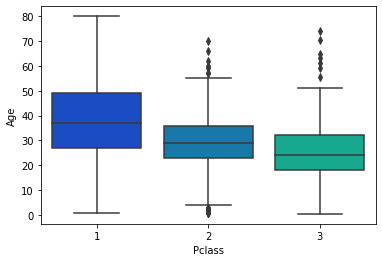

In [5]:
sns.boxplot(x = 'Pclass', y = 'Age', data = data, palette='winter')

As we can see that in Pclass1 the age is approximately 37 years to 50th percentile line, 29 in Pclass2 and 24 in Pclass3.
We will make this as our estimated value and we replace null age where needed. 

In [6]:
def impute_age(data):
    Age = data["Age"]
    Pclass = data["Pclass"]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
data["Age"] = data.apply(impute_age, axis = 1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

## Homework:
If we would not drop Cabin column because of missing data, how could we impute missing values? Would median also work here?